# Image Blurring

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (eg: noise, edges) from the image.

There are a lot of different effects and filters we can apply to images. Most of them involve some sort of math based function being applied to all the pixels values.

[Smoothing Images](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html)



## Importing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Creating image display function

In [2]:
def display_img(img):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.imshow(img)

## Loading the Image

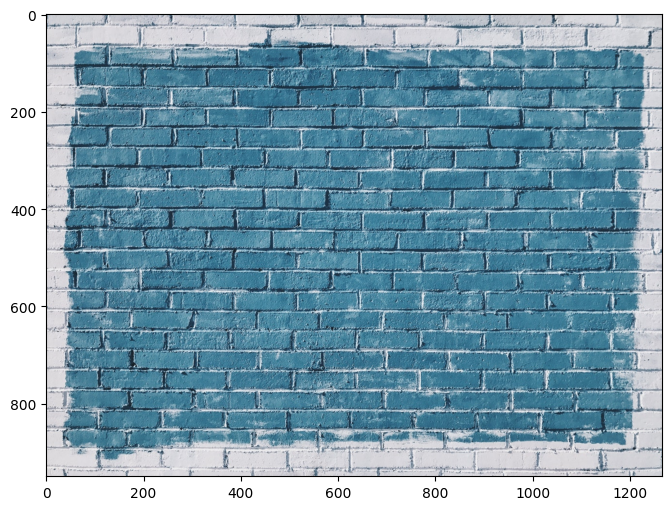

In [3]:
img = cv2.imread('../DATA/bricks.jpg').astype(np.float32) / 255
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display_img(img)

## Gamma Correction

Gamma correction can be used to correct the brightness of an image by using a non linear transformation between the input values and the mapped output values

$$ O = (img)^ \gamma $$

When γ < 1, the original dark regions will be brighter and the histogram will be shifted to the right whereas it will be the opposite with γ > 1.

### When γ < 1

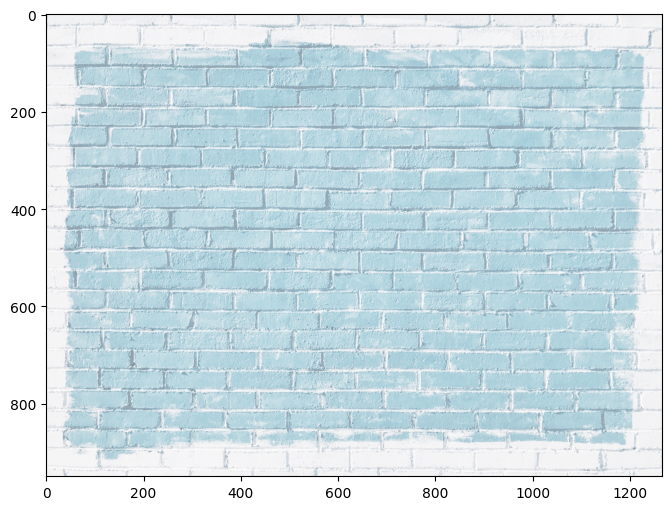

In [4]:
gamma = 1/4
effected_image = np.power(img, gamma)
display_img(effected_image)

### When γ > 1

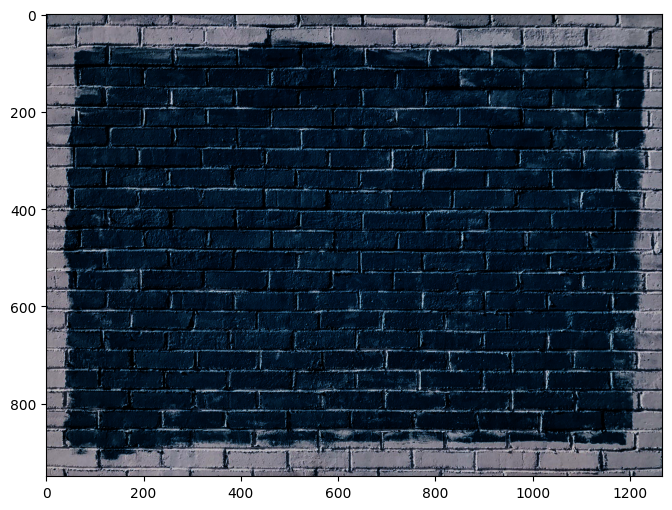

In [5]:
gamma = 4
effected_image = np.power(img, gamma)
display_img(effected_image)

## Low Pass Filter with a 2D Convolution

As in one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. LPF helps in removing noise, blurring images, etc. HPF filters help in finding edges in images.

A filtering operation known as 2D convolution can be used to create a low-pass filter. OpenCV provides a function `cv.filter2D` to convolve a kernel with an image

### Modify the image

We will put a text in the image to clearly see the effects of filters.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


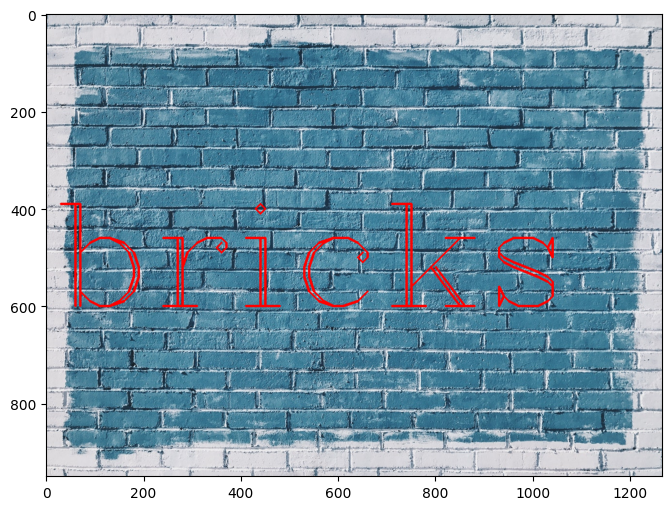

In [6]:
cv2.putText(img, text='bricks', org=(10, 600), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale= 10, color=(255, 0, 0), thickness=4)
display_img(img)

### Create the Kernel

An image kernel is a small matrix used to apply effects like blurring, sharpening, outlining or embossing. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel will look like the below:

$$  K = \frac{1}{25} \begin{pmatrix}
  1 & 1 & 1 & 1 & 1\\
  1 & 1 & 1 & 1 & 1\\
  1 & 1 & 1 & 1 & 1\\
  1 & 1 & 1 & 1 & 1\\
  1 & 1 & 1 & 1 & 1
 \end{pmatrix}


In [7]:
kernel = np.ones(shape=(5, 5), dtype=np.float32) / 25

### Apply the Kernel

The operation works like this: keep this kernel above a pixel, add all the 25 pixels below this kernel, take the average, and replace the central pixel with the new average value. This operation is continued for all the pixels in the image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


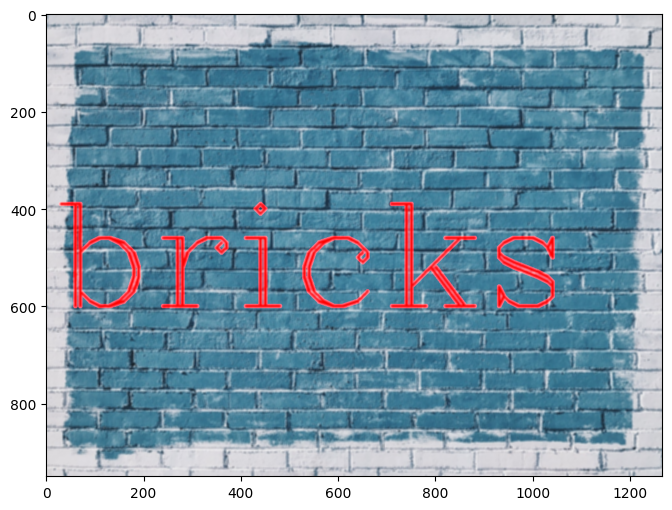

In [8]:
dst = cv2.filter2D(img,-1,kernel)
display_img(dst)

## Blurring

OpenCV provides four main types of blurring techniques.

### Averaging

This is done by convolving an image with a normalized box filter. It simply takes the average of all the pixels under the kernel area and replaces the central element. This is done by the function `cv.blur`. We should specify the width and height of the kernel.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


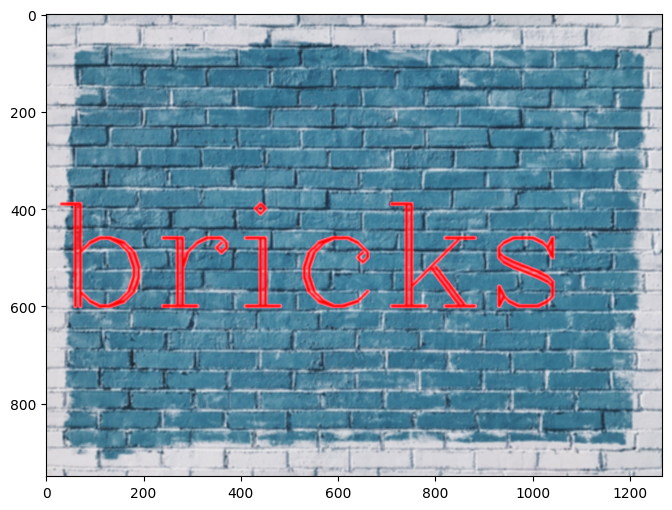

In [9]:
blurred = cv2.blur(img, ksize=(5, 5))
display_img(blurred)

### Gaussian Blurring

In this method, instead of a box filter, a Gaussian kernel is used. It is done with the function, `cv.GaussianBlur`. We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as the same as sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is highly effective in removing Gaussian noise from an image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


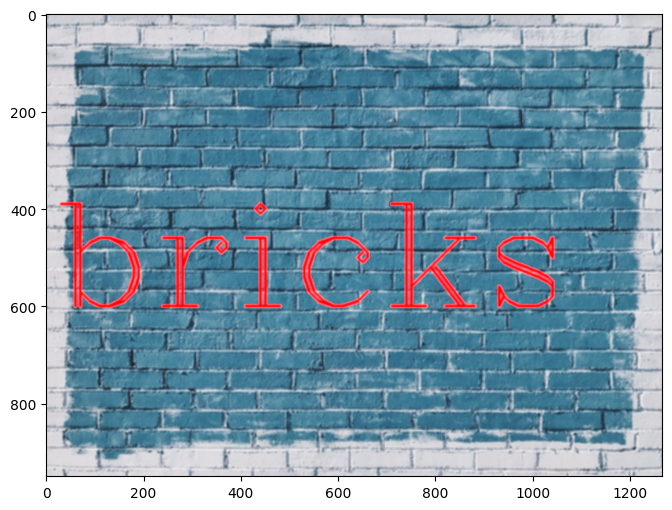

In [10]:
gaussian = cv2.GaussianBlur(img, (5, 5), 10)
display_img(gaussian)

### Median Blurring

Here, the function `cv.medianBlur` takes the median of all the pixels under the kernel area and the central element is replaced with this median value. This is highly effective against salt-and-pepper noise in an image. Interestingly, in the above filters, the central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, the central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


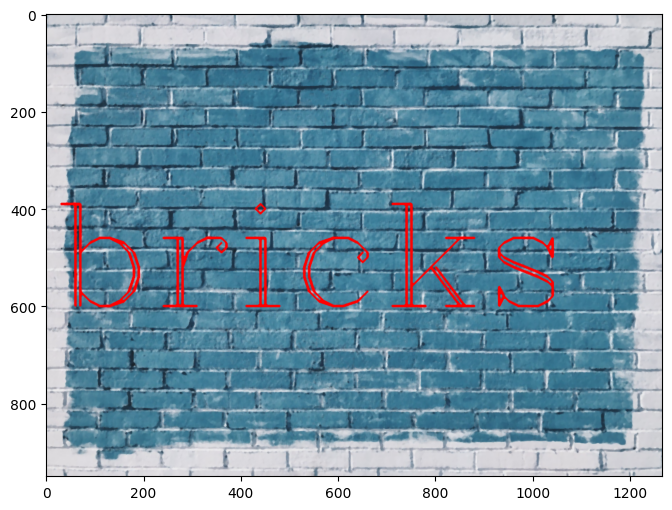

In [11]:
median = cv2.medianBlur(img, 5)
display_img(median)

### Bilateral Filtering

`cv.bilateralFilter` is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that a Gaussian filter takes the neighbourhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost the same intensity. It doesn't consider whether a pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

The Gaussian function of space makes sure that only nearby pixels are considered for blurring, while the Gaussian function of intensity difference makes sure that only those pixels with similar intensities to the central pixel are considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


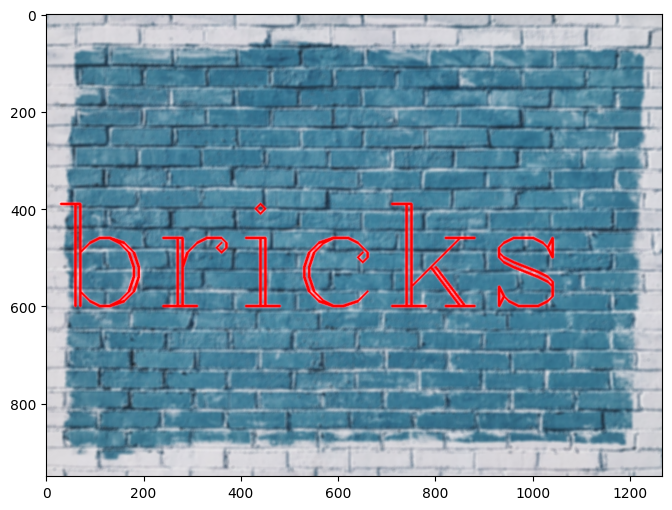

In [12]:
bilateral = cv2.bilateralFilter(img, 9, 75, 75)
display_img(bilateral)